# Preparacion de los datos

In [ ]:
# Importar TensorFlow para construir y entrenar modelos de aprendizaje profundo
import tensorflow as tf

# Importar NumPy para operaciones numéricas y manipulación de matrices
import numpy as np

# Importar Matplotlib para la visualización de datos y gráficos
import matplotlib.pyplot as plt

In [ ]:
# Verificar la disponibilidad de GPUs
# Este código imprime el número de GPUs disponibles en el sistema.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Habilitar la ejecución ansiosa (Eager Execution) en TensorFlow
# Esto permite que las operaciones se ejecuten inmediatamente en lugar de construir un gráfico computacional.
# Es útil para depuración y desarrollo interactivo.
tf.compat.v1.enable_eager_execution()
print("Eager execution enabled.")

Eager execution enabled.


In [ ]:
# Definir el tamaño de las imágenes y el tamaño del batch
# img_size: Tamaño al que se redimensionarán las imágenes (ancho, alto)
# batch_size: Número de imágenes que se procesarán en cada batch
img_size = (224, 224)
batch_size = 32

In [ ]:
# Cargar el conjunto de datos de entrenamiento desde el directorio especificado
# "dataset/train": Ruta al directorio que contiene las imágenes de entrenamiento organizadas por clases
# image_size: Tamaño al que se redimensionarán las imágenes (ancho, alto)
# batch_size: Número de imágenes que se procesarán en cada batch
# seed: Semilla para garantizar la reproducibilidad en el orden de las imágenes
# label_mode: Modo de etiquetado, 'categorical' indica que las etiquetas serán codificadas como categorías

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size = img_size,
    batch_size = batch_size,
    seed = 42,
    label_mode = 'categorical'
)

# Obtener los nombres de las clases del conjunto de datos
# Esto devuelve una lista con los nombres de las carpetas que representan las clases
class_names = train_ds.class_names

Found 7200 files belonging to 24 classes.


In [ ]:
# Cargar el conjunto de datos de prueba desde el directorio especificado
# "dataset/test": Ruta al directorio que contiene las imágenes de prueba organizadas por clases
# image_size: Tamaño al que se redimensionarán las imágenes (ancho, alto)
# batch_size: Número de imágenes que se procesarán en cada batch
# seed: Semilla para garantizar la reproducibilidad en el orden de las imágenes
# label_mode: Modo de etiquetado, 'categorical' indica que las etiquetas serán codificadas como categorías

test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size = img_size,
    batch_size = batch_size,
    seed = 42,
    label_mode = 'categorical'
)

Found 1200 files belonging to 24 classes.


In [ ]:
# Normalización de los datos
# Se utiliza una capa de reescalado (Rescaling) para normalizar los valores de los píxeles de las imágenes.
# Los valores de los píxeles se reescalan al rango [0, 1] dividiendo entre 255.
# Esto ayuda a mejorar la estabilidad y el rendimiento del modelo durante el entrenamiento.

normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicar la normalización al conjunto de datos de entrenamiento
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Aplicar la normalización al conjunto de datos de prueba
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Definición de la capa de aumento de datos
# Esta capa aplica transformaciones aleatorias a las imágenes para aumentar la diversidad del conjunto de datos de entrenamiento.
# RandomFlip: Invierte las imágenes horizontalmente de forma aleatoria.
# RandomRotation: Rota las imágenes aleatoriamente dentro de un rango de 0.1 radianes.
# RandomZoom: Aplica un zoom aleatorio a las imágenes dentro de un rango de 0.1.
# RandomContrast: Ajusta aleatoriamente el contraste de las imágenes dentro de un rango de 0.1.

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [ ]:
# Cargar el conjunto de datos de validación desde el directorio especificado
# "dataset/valid": Ruta al directorio que contiene las imágenes de validación organizadas por clases
# image_size: Tamaño al que se redimensionarán las imágenes (ancho, alto)
# batch_size: Número de imágenes que se procesarán en cada batch
# seed: Semilla para garantizar la reproducibilidad en el orden de las imágenes
# label_mode: Modo de etiquetado, 'categorical' indica que las etiquetas serán codificadas como categorías

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/valid",  # Carpeta con imágenes de validación
    image_size=img_size,
    batch_size=batch_size,
    seed=42,
    label_mode='categorical'
)

# Normalización de los datos de validación
# Se utiliza una capa de reescalado (Rescaling) para normalizar los valores de los píxeles de las imágenes.
# Los valores de los píxeles se reescalan al rango [0, 1] dividiendo entre 255.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 1200 files belonging to 24 classes.


In [ ]:
# Prefetching de datos
# Se utiliza la función prefetch para mejorar el rendimiento del pipeline de datos.
# Prefetch permite que el procesamiento de datos y el entrenamiento del modelo se realicen en paralelo.
# tf.data.AUTOTUNE ajusta automáticamente el número de elementos a prefetch según los recursos disponibles.

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
# Inspección de las etiquetas del conjunto de datos de entrenamiento
# Este código toma un batch del conjunto de datos de entrenamiento y muestra la forma de las etiquetas.
# Esto es útil para verificar que las etiquetas estén correctamente codificadas como categorías.
for images, labels in train_ds.take(1):
    print("Etiquetas:", labels.shape)  # Debería ser (batch_size, 24)

Etiquetas: (32, 24)


2025-03-29 16:52:45.545125: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


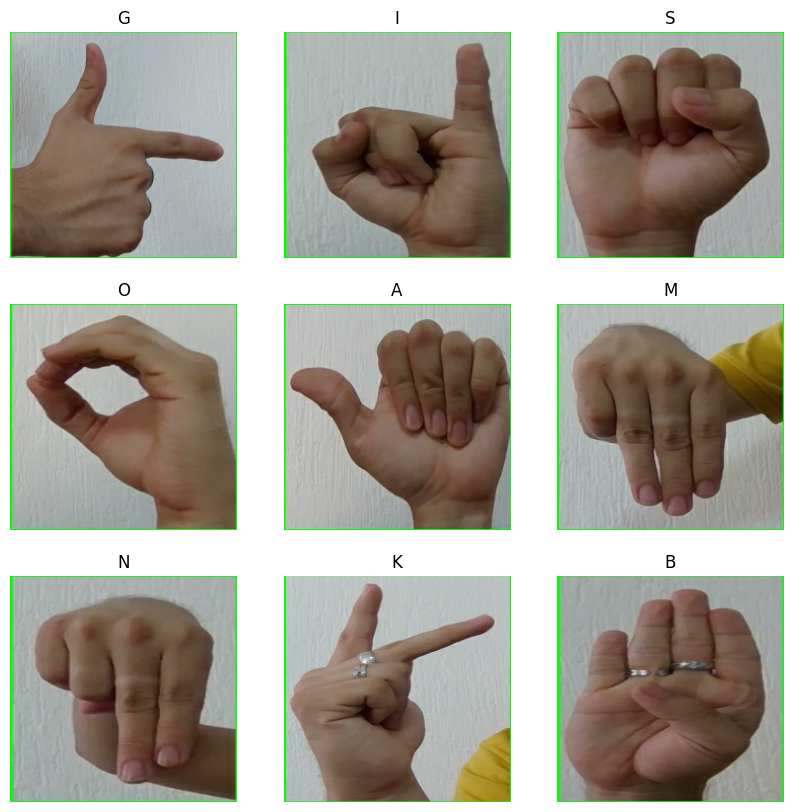

In [ ]:
# Visualización de imágenes del conjunto de datos de entrenamiento
# Este código selecciona un batch del conjunto de datos de entrenamiento y muestra las primeras 9 imágenes.
# Cada imagen se muestra junto con su etiqueta correspondiente.
# La figura se organiza en una cuadrícula de 3x3 para facilitar la visualización.

plt.figure(figsize=(10, 10))  # Configurar el tamaño de la figura
for images, labels in train_ds.take(1):  # Tomar un batch del conjunto de datos de entrenamiento
    for i in range(9):  # Iterar sobre las primeras 9 imágenes del batch
        ax = plt.subplot(3, 3, i + 1)  # Crear un subplot en la cuadrícula 3x3
        plt.imshow(images[i])  # Mostrar la imagen
        plt.title(class_names[tf.argmax(labels[i])])  # Mostrar la etiqueta correspondiente
        plt.axis("off")  # Ocultar los ejes para una visualización más limpia

# Arquitectura de la red neuronal

In [ ]:
from tensorflow import keras
from tensorflow.keras import models, regularizers, layers

# Definición del modelo secuencial
# Este modelo utiliza una arquitectura de red neuronal convolucional (CNN) para la clasificación de imágenes.

model = models.Sequential([
    # Capa de preprocesamiento
    # Incluye aumento de datos y normalización de los valores de los píxeles.
    data_augmentation,  # Aumento de datos para mejorar la generalización del modelo
    layers.Rescaling(1./255),  # Normalización de los valores de los píxeles al rango [0, 1]
    
    # Bloque 1
    # Primer bloque convolucional con 32 filtros, normalización por lotes, y regularización mediante Dropout.
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Capa convolucional
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),  # Reducción de dimensionalidad mediante MaxPooling
    layers.Dropout(0.3),  # Regularización para prevenir sobreajuste
    
    # Bloque 2
    # Segundo bloque convolucional con 32 filtros, normalización por lotes, y regularización mediante Dropout.
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Capa convolucional
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),  # Reducción de dimensionalidad mediante MaxPooling
    layers.Dropout(0.3),  # Regularización para prevenir sobreajuste
    
    # Bloque 3
    # Tercer bloque convolucional con 64 filtros, normalización por lotes, y regularización mediante Dropout.
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Capa convolucional
    layers.BatchNormalization(),  # Normalización por lotes
    layers.MaxPooling2D((2, 2)),  # Reducción de dimensionalidad mediante MaxPooling
    layers.Dropout(0.4),  # Regularización para prevenir sobreajuste
    
    # Clasificación
    # Capas densas para aplanar las características y realizar la clasificación final.
    layers.Flatten(),  # Aplanamiento de las características extraídas por las capas convolucionales
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Capa densa con regularización L2
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Dropout(0.5),  # Regularización para prevenir sobreajuste
    layers.Dense(len(class_names), activation='softmax')  # Capa de salida con activación softmax para clasificación
])

# Resumen del modelo
# Muestra la arquitectura del modelo, incluyendo el número de parámetros entrenables.
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Importar el optimizador Adam desde Keras
# Adam es un optimizador basado en gradiente estocástico que combina las ventajas de AdaGrad y RMSProp.
# Es ampliamente utilizado debido a su eficiencia y capacidad para manejar problemas con grandes cantidades de datos y parámetros.
from tensorflow.keras.optimizers import Adam

In [ ]:
# Tasa de aprendizaje con programación (schedule)
# Se define una tasa de aprendizaje inicial y se utiliza un decaimiento exponencial para reducirla
# gradualmente durante el entrenamiento. Esto ayuda a estabilizar el aprendizaje en etapas posteriores.
initial_learning_rate = 0.001  # Tasa de aprendizaje inicial
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,  # Tasa de aprendizaje inicial
    decay_steps=1000,  # Número de pasos después de los cuales se aplica el decaimiento
    decay_rate=0.9,  # Factor de decaimiento
    staircase=True  # Si es True, el decaimiento ocurre en pasos discretos
)

# Optimizador Adam con la tasa de aprendizaje programada
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Función de pérdida mejorada
# Se utiliza la entropía cruzada categórica como función de pérdida, con suavizado de etiquetas (label smoothing)
# para reducir la confianza excesiva del modelo en las predicciones y mejorar la generalización.
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,  # Indica que las salidas del modelo son probabilidades (no logits)
    label_smoothing=0.1  # Suavizado de etiquetas para regularizar
)

# Compilación del modelo
# Se especifica el optimizador, la función de pérdida y las métricas que se evaluarán durante el entrenamiento.
model.compile(
    optimizer=optimizer,  # Optimizador Adam con programación de tasa de aprendizaje
    loss=loss_fn,  # Función de pérdida con suavizado de etiquetas
    metrics=['accuracy']  # Métrica de precisión para evaluar el rendimiento
)

# Callback de detención temprana (Early Stopping)
# Detiene el entrenamiento si la precisión en el conjunto de validación no mejora después de 10 épocas consecutivas.
# Además, restaura los pesos del modelo al mejor estado alcanzado durante el entrenamiento.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Métrica a monitorear (precisión en validación)
    patience=10,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaura los mejores pesos al final del entrenamiento
)

In [76]:
model

<Sequential name=sequential_5, built=False>

# Entrenamiento

In [ ]:
# Entrenamiento del modelo
# Se entrena el modelo utilizando el conjunto de datos de entrenamiento (train_ds) y validación (val_ds).
# El entrenamiento se realiza durante un máximo de 50 épocas, pero puede detenerse antes si se activa el callback de detención temprana (early_stopping).
# El callback de detención temprana monitorea la precisión en el conjunto de validación y detiene el entrenamiento si no hay mejora durante 10 épocas consecutivas.
history = model.fit(
    train_ds,  # Conjunto de datos de entrenamiento
    validation_data=val_ds,  # Conjunto de datos de validación
    epochs=50,  # Número máximo de épocas
    callbacks=[early_stopping]  # Callback para detener el entrenamiento temprano si es necesario
)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 869ms/step - accuracy: 0.6565 - loss: 4.6965 - val_accuracy: 0.0417 - val_loss: 23.5306
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 199s 883ms/step - accuracy: 0.9571 - loss: 1.8981 - val_accuracy: 0.0417 - val_loss: 22.8731
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 867ms/step - accuracy: 0.9679 - loss: 1.8296 - val_accuracy: 0.0233 - val_loss: 16.3998
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 868ms/step - accuracy: 0.9824 - loss: 1.8144 - val_accuracy: 0.5550 - val_loss: 5.4742
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 195s 867ms/step - accuracy: 0.9803 - loss: 1.7354 - val_accuracy: 0.7300 - val_loss: 3.9805
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 196s 871ms/step - accuracy: 0.9890 - loss: 1.6555 - val_accuracy: 0.7750 - val_loss: 5.2904
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 200s 889ms/step - accuracy: 0.9838 - loss: 1.5506 - val_accuracy: 0.8592 - val_loss: 2.2511
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 196s 871ms/step - accuracy: 0.989

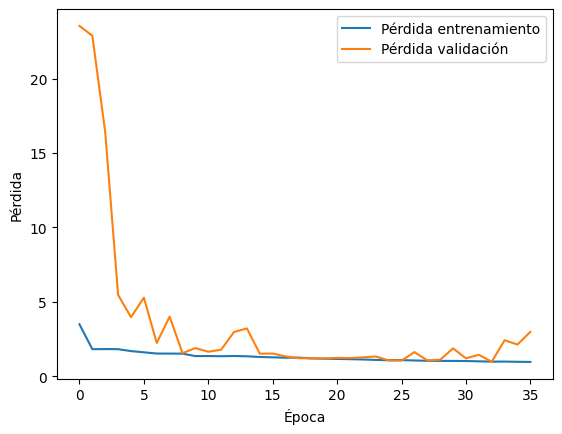

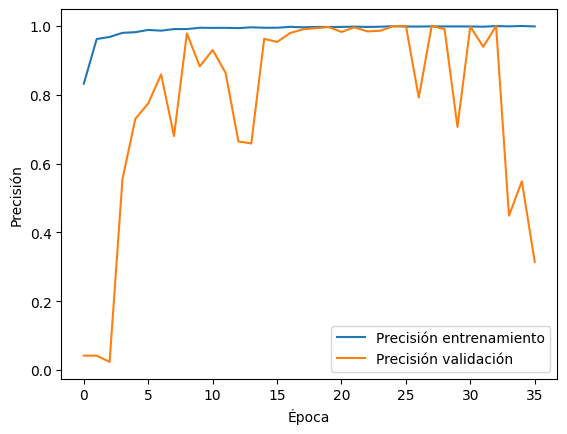

In [ ]:
# Gráfica de pérdidas
# Este código genera una gráfica que muestra la evolución de la pérdida durante el entrenamiento y la validación.
# La pérdida es una métrica que indica qué tan bien se está ajustando el modelo a los datos.
# Se utiliza para monitorear el progreso del entrenamiento y detectar problemas como el sobreajuste.
plt.plot(history.history['loss'], label='Pérdida entrenamiento')  # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'], label='Pérdida validación')  # Pérdida en el conjunto de validación
plt.xlabel('Época')  # Etiqueta del eje x (número de épocas)
plt.ylabel('Pérdida')  # Etiqueta del eje y (valor de la pérdida)
plt.legend()  # Mostrar la leyenda para identificar las curvas
plt.show()  # Mostrar la gráfica

# Gráfica de precisión
# Este código genera una gráfica que muestra la evolución de la precisión durante el entrenamiento y la validación.
# La precisión es una métrica que indica qué tan bien el modelo está clasificando las imágenes correctamente.
# Es útil para evaluar el rendimiento del modelo y comparar su desempeño en entrenamiento y validación.
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='Precisión validación')  # Precisión en el conjunto de validación
plt.xlabel('Época')  # Etiqueta del eje x (número de épocas)
plt.ylabel('Precisión')  # Etiqueta del eje y (valor de la precisión)
plt.legend()  # Mostrar la leyenda para identificar las curvas
plt.show()  # Mostrar la gráfica

In [ ]:
# Generación de predicciones en el conjunto de datos de prueba
# Este código utiliza el modelo entrenado para realizar predicciones sobre el conjunto de datos de prueba (test_ds).
# Las predicciones son probabilidades para cada clase, y se selecciona la clase con la mayor probabilidad.

predictions = model.predict(test_ds)  # Realizar predicciones en el conjunto de prueba

# Obtener las clases predichas
# Se utiliza np.argmax para seleccionar el índice de la clase con la mayor probabilidad para cada predicción.
predicted_classes = np.argmax(predictions, axis=1)

# Obtener los nombres de las clases predichas
# Se utiliza la lista class_names para mapear los índices de las clases a sus nombres correspondientes.
predicted_class_names = [class_names[i] for i in predicted_classes]

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step


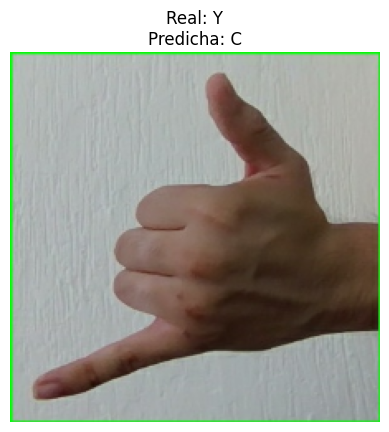

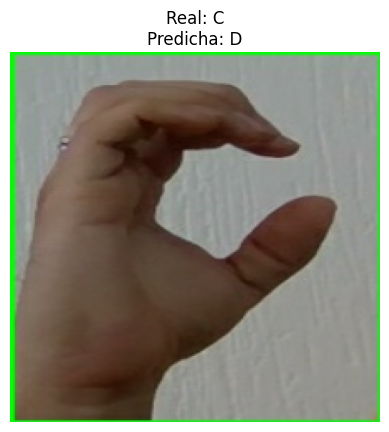

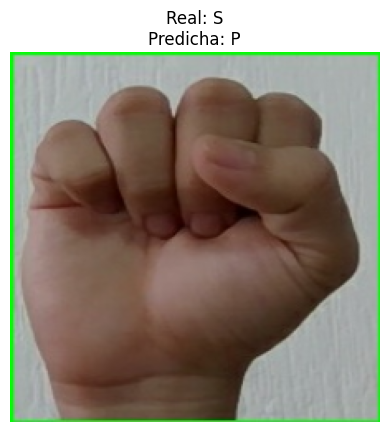

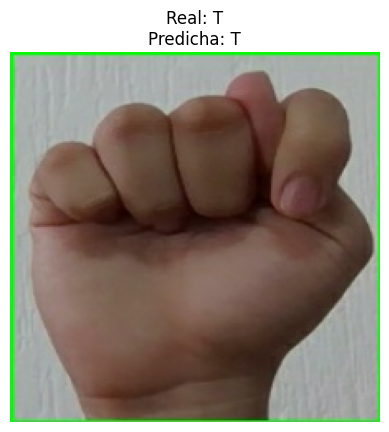

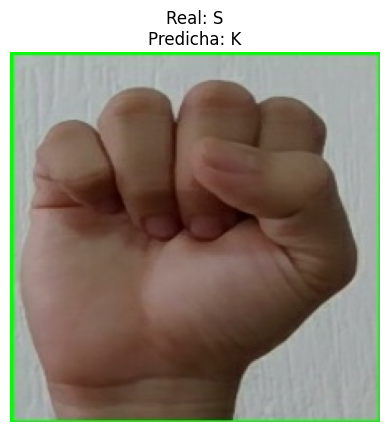

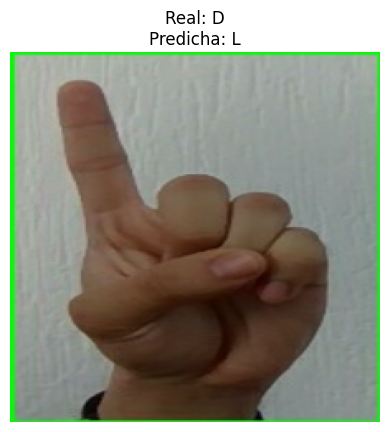

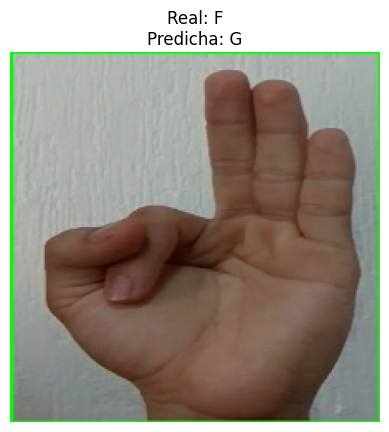

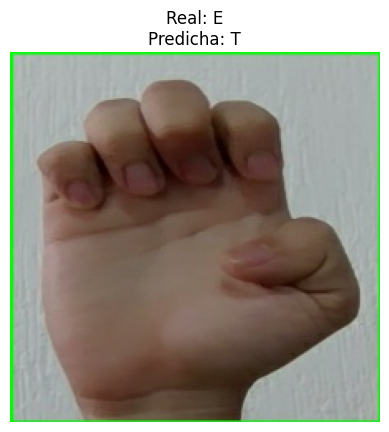

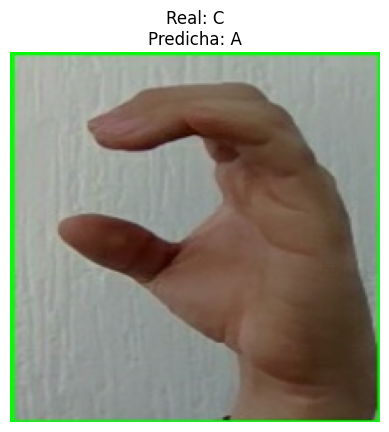

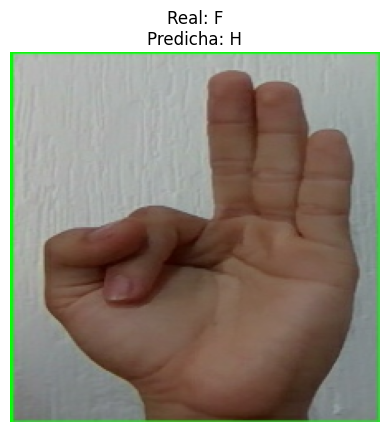

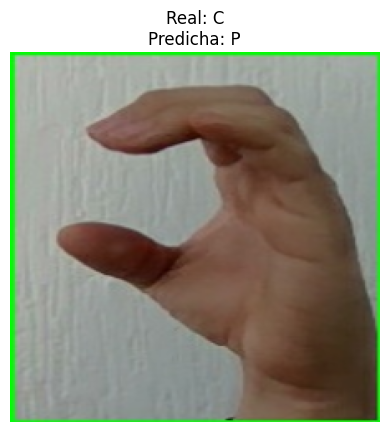

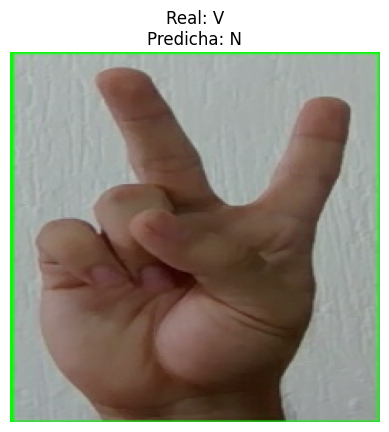

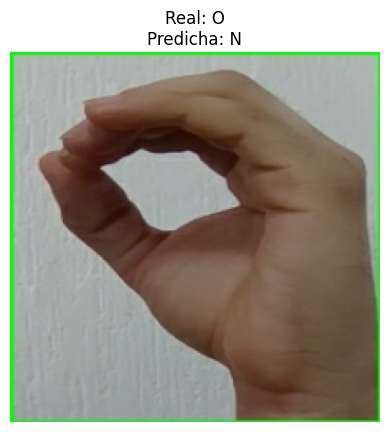

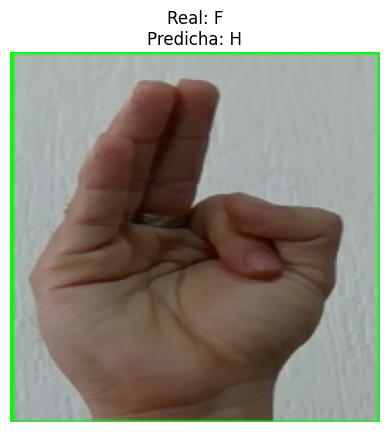

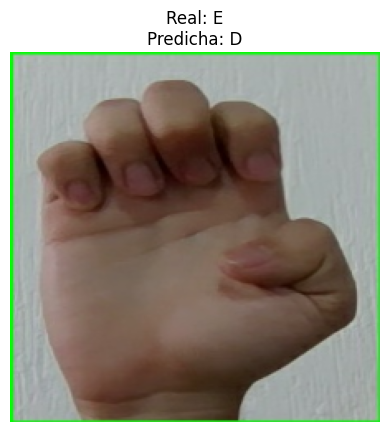

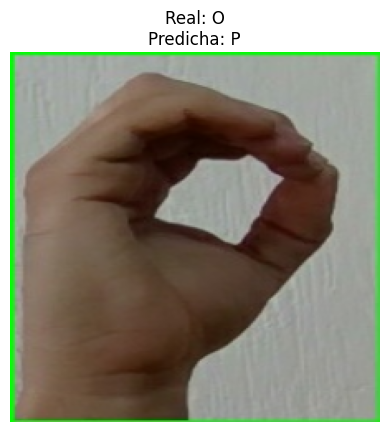

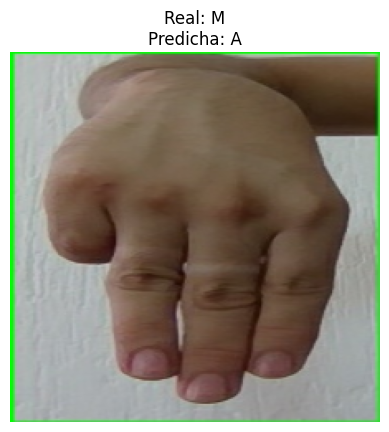

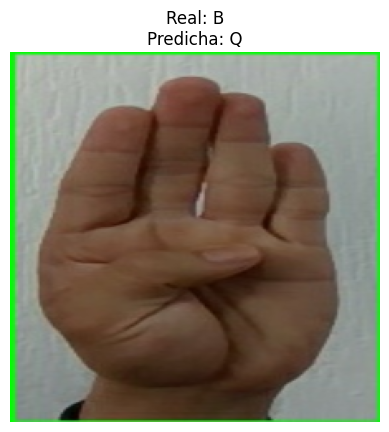

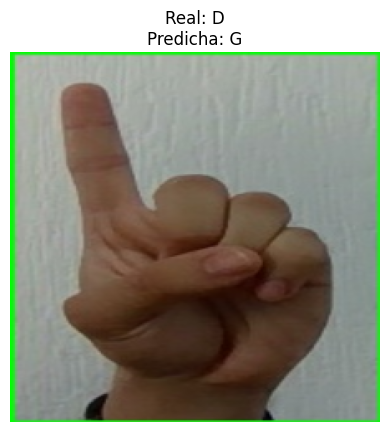

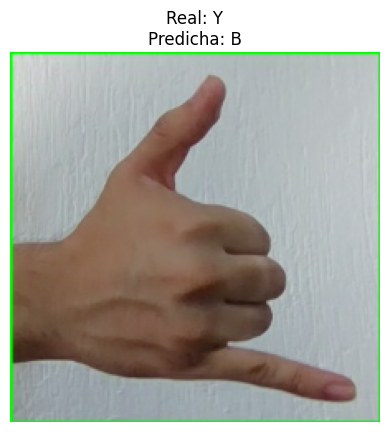

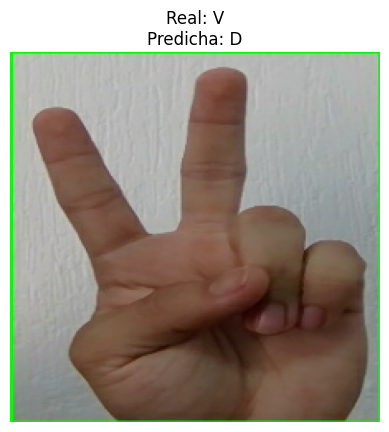

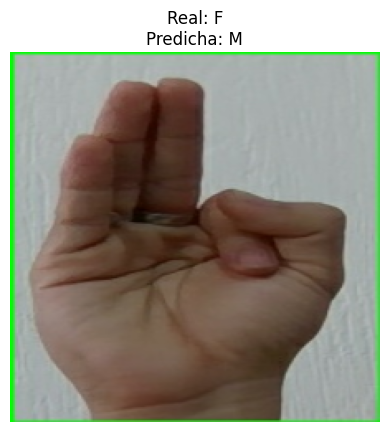

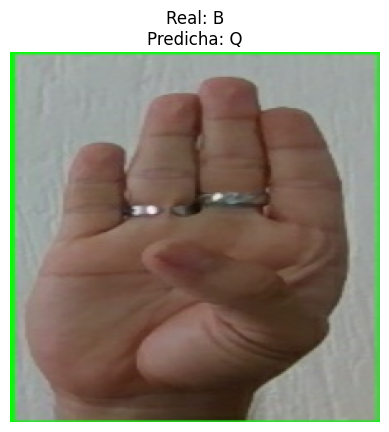

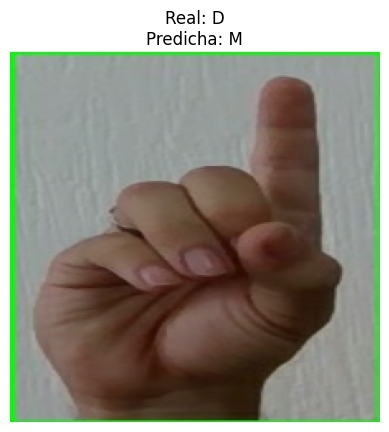

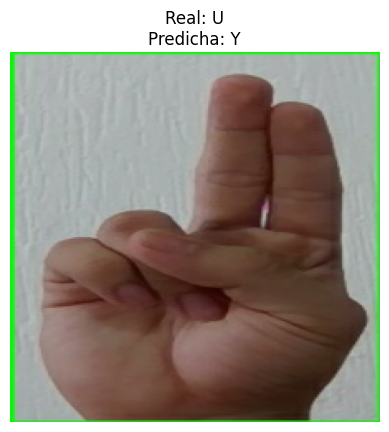

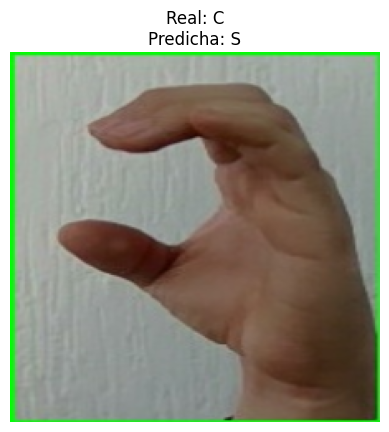

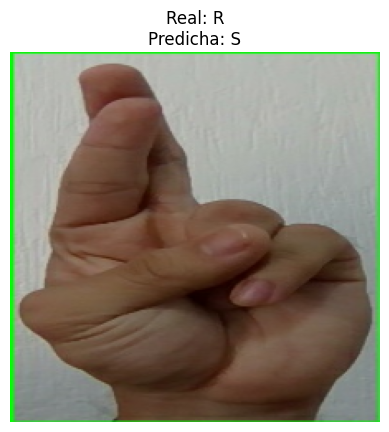

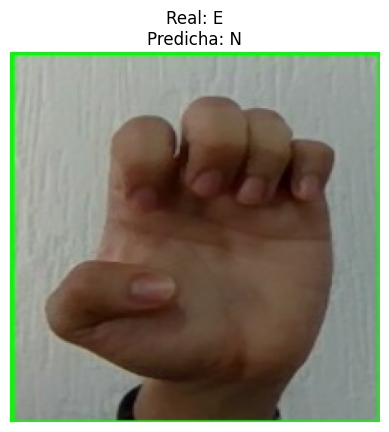

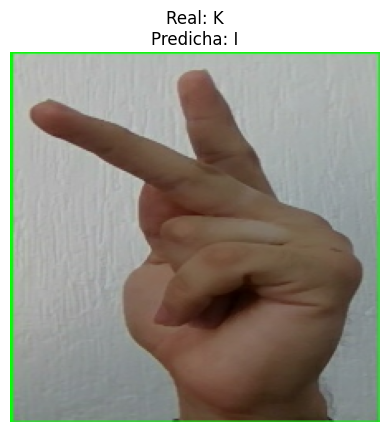

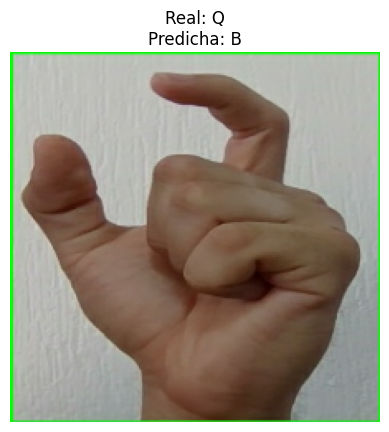

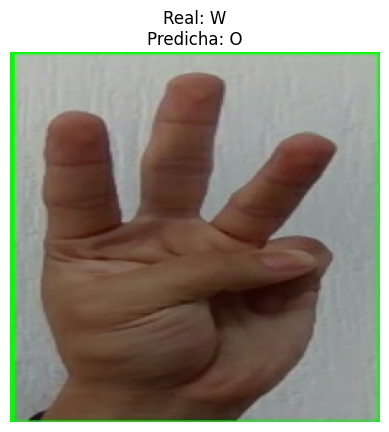

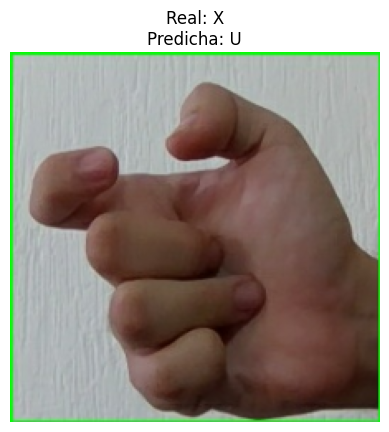

In [ ]:
# Visualización de predicciones en el conjunto de datos de prueba
# Este código selecciona un batch del conjunto de datos de prueba y muestra las imágenes junto con sus etiquetas reales y predichas.
# Es útil para evaluar visualmente el rendimiento del modelo y verificar si las predicciones son correctas.

# Obtener un batch de imágenes y etiquetas del dataset de prueba
for images, labels in test_ds.take(1):  # Tomar un batch del conjunto de datos de prueba
    for i in range(len(images)):  # Iterar sobre todas las imágenes del batch

        plt.imshow(images[i])  # Mostrar la imagen actual
        plt.axis("off")  # Ocultar los ejes para una visualización más limpia

        # Obtener la etiqueta real de la imagen
        # Se utiliza np.argmax para convertir la codificación categórica de la etiqueta a su índice correspondiente
        true_label = class_names[np.argmax(labels[i])]

        # Obtener la etiqueta predicha por el modelo
        # Se utiliza la lista de nombres de clases predichas generada previamente
        predicted_label = predicted_class_names[i]

        # Mostrar las etiquetas real y predicha como título de la imagen
        plt.title(f"Real: {true_label}\nPredicha: {predicted_label}")

        plt.show()  # Mostrar la imagen con las etiquetas

In [ ]:
# Guardar el modelo entrenado en un archivo
# Este código guarda el modelo entrenado en un archivo con formato .keras.
# Esto permite cargar el modelo posteriormente para realizar predicciones o continuar el entrenamiento.
model.save("modelo_senas.keras")

In [ ]:
# Cargar el modelo previamente entrenado
# Este código carga un modelo guardado en un archivo con formato .keras.
# Esto permite reutilizar el modelo para realizar predicciones o continuar el entrenamiento sin necesidad de entrenarlo desde cero.
model = keras.models.load_model("modelo_senas.keras")